<a href="https://colab.research.google.com/github/Amonye/Amonye/blob/main/Dathathon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



In [ ]:
#In order to import the data downloaded from kaggle, we need to load it onto our jupyter notebook
# Task 1.2: Load the dataset into a Pandas DataFrame

In [10]:
# Step 1: Load datasets (example CSV file paths)
students_df = pd.read_csv('/content/Tables  - Students Data.csv') #Student record
grades_df = pd.read_csv('/content/Tables  - grades.csv')  # Academic history and last exam scores
attendance_df = pd.read_csv('/content/Tables  - Attendance_data.csv')  # Attendance data
extra_curricular_df = pd.read_csv('/content/Tables  - Extracurricular activities.csv')  # Extracurricular data
parent_data_df = pd.read_csv('/content/Tables  - Parent Data.csv')  # Socioeconomic and family involvement data



In [11]:
students_df.drop(['date_of_birth','street_address', 'date_enrolled'], axis=1, inplace=True)

In [12]:
# Step 2: Merge datasets on a unique identifier (student_id)
merged_df = grades_df.merge(attendance_df, on='student_id', how='left') \
                     .merge(extra_curricular_df, on='student_id', how='left') \
                     .merge(students_df, on = 'student_id', how='left')




In [13]:
merged_df1 = pd.merge(parent_data_df, students_df, on='parent_id', how='left')


In [14]:
merged_df2 = pd.merge(merged_df, merged_df1, on='parent_id', how='left')

In [ ]:
merged_df2.drop(['parent_id', 'subject_id', 'student_id_x','student_id_y','class_id_x','class_id_y','attendance_id','activity_id','subject_id', 'grade_id'], axis=1, inplace=True)

In [15]:
merged_df2.shape

(10182120, 39)

In [16]:
# Assuming your DataFrame is named 'df'

# Get the total number of rows in the DataFrame
total_rows = len(merged_df2)

# Drop the bottom 500,000 rows using iloc
merged_df2 = merged_df2.iloc[:total_rows - 9000000]

# Now 'df' will have the top (total_rows - 500000) rows


In [17]:
merged_df2.shape

(1182120, 39)

array([[<Axes: title={'center': 'grade_id'}>,
        <Axes: title={'center': 'student_id_x'}>,
        <Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'first_test'}>],
       [<Axes: title={'center': 'second_test'}>,
        <Axes: title={'center': 'exam'}>,
        <Axes: title={'center': 'total_score'}>,
        <Axes: title={'center': 'academic_year'}>],
       [<Axes: title={'center': 'attendance_id'}>,
        <Axes: title={'center': 'activity_id'}>,
        <Axes: title={'center': 'hours_spent'}>,
        <Axes: title={'center': 'parent_id'}>],
       [<Axes: title={'center': 'class_id_x'}>,
        <Axes: title={'center': 'age_x'}>,
        <Axes: title={'center': 'student_id_y'}>,
        <Axes: title={'center': 'class_id_y'}>],
       [<Axes: title={'center': 'age_y'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

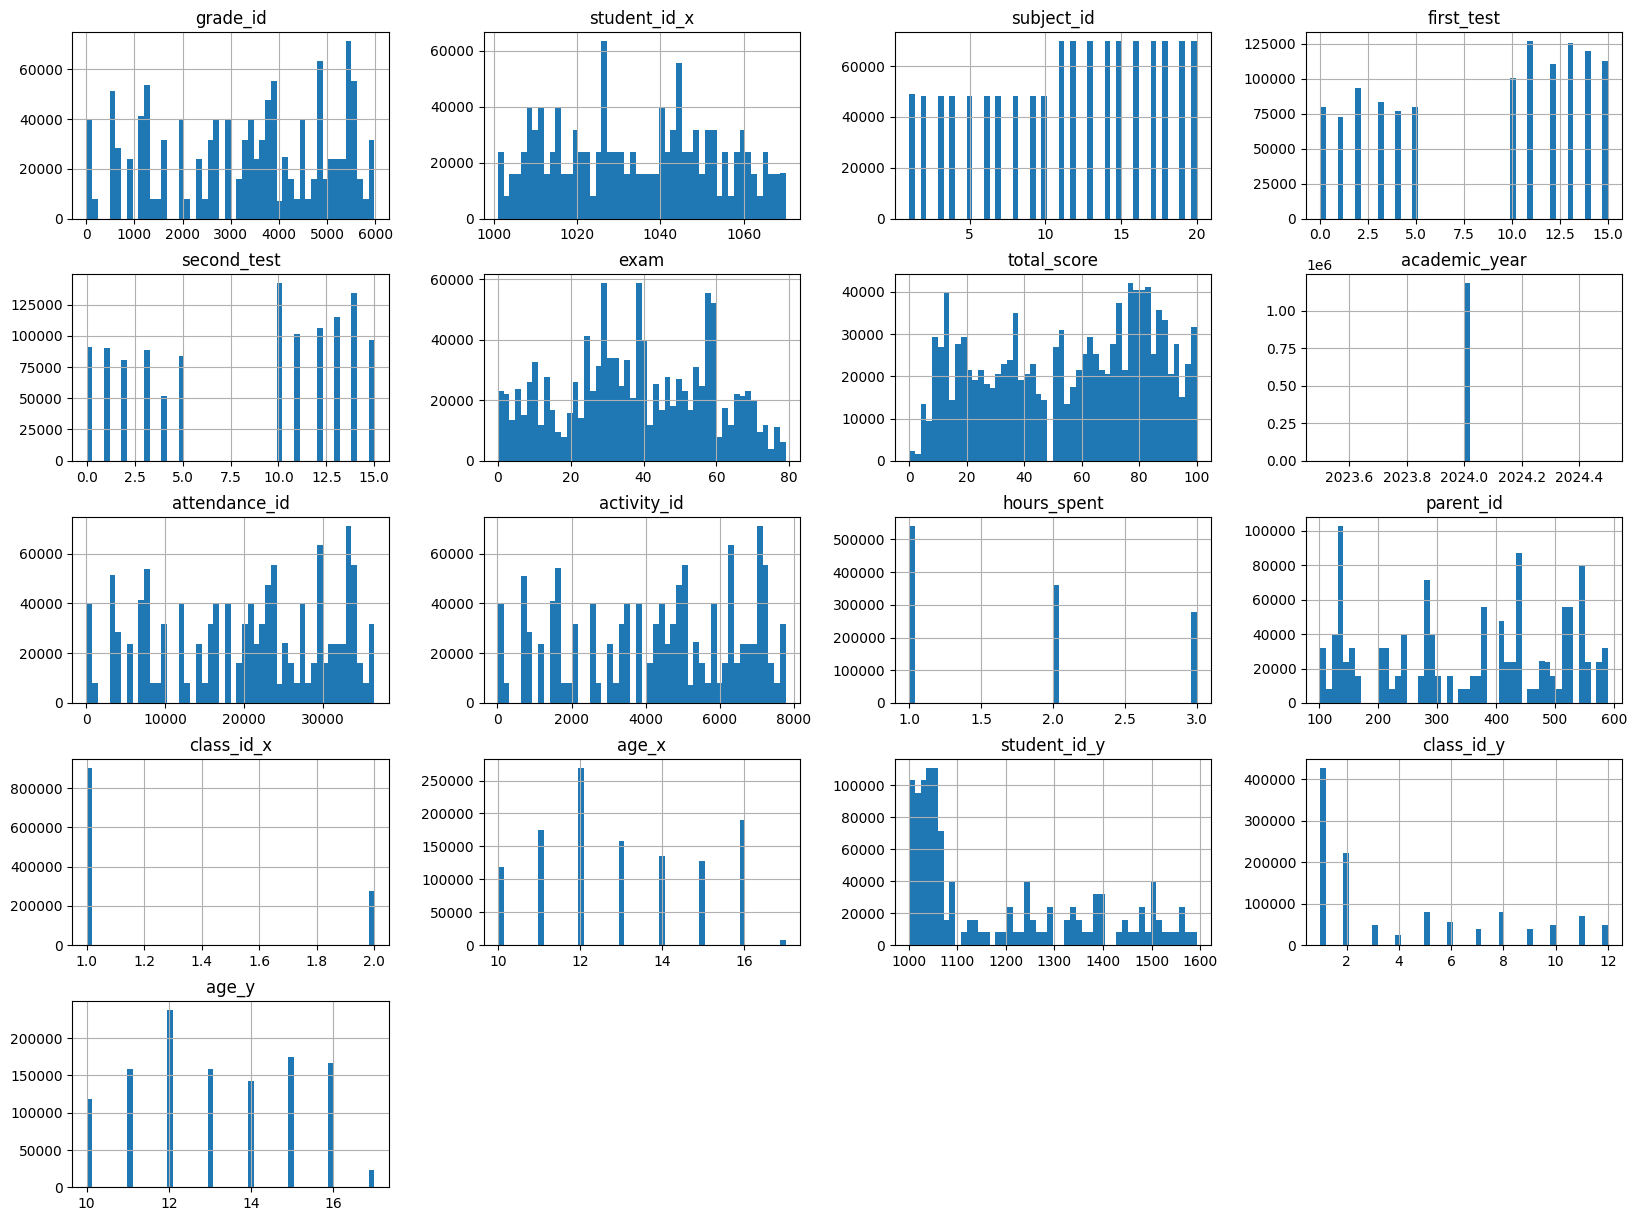

In [18]:
merged_df2.hist(bins=50, figsize=(20,15))

<Axes: ylabel='count'>

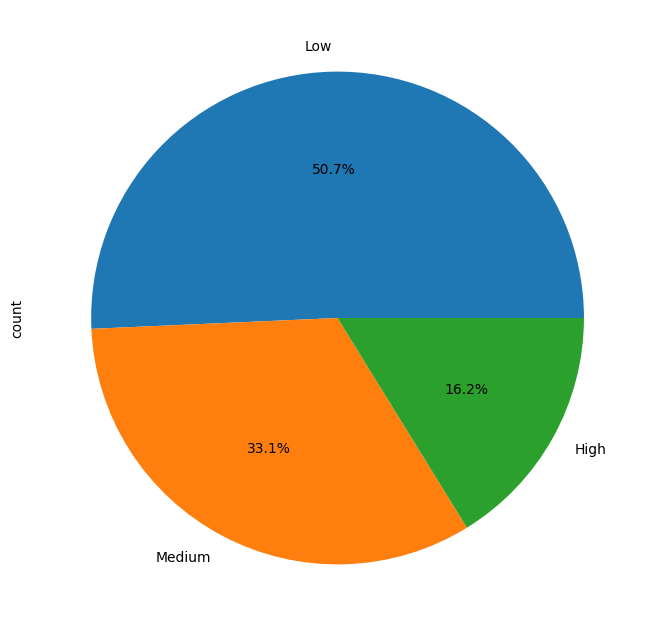

In [ ]:
# Pie chart for income_bracket
merged_df2['income_bracket'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))


In [ ]:
merged_df2.shape()

,grade_id,student_id_x,subject_id,first_test,second_test,exam,total_score,academic_year,attendance_id,activity_id,hours_spent,parent_id,class_id_x,age_x,student_id_y,class_id_y,age_y
count,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,10182120.0,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07,1.018212e+07
mean,2.980796e+03,1.300787e+03,1.053894e+01,8.580374e+00,8.596807e+00,3.868162e+01,5.585880e+01,2024.0,1.818031e+04,3.874885e+03,1.889348e+00,3.418357e+02,6.496885e+00,1.325156e+01,1.300787e+03,6.496885e+00,1.325156e+01
std,1.718371e+03,1.736205e+02,5.766150e+00,5.165434e+00,5.216554e+00,1.975976e+01,2.783247e+01,0.0,1.048206e+04,2.233882e+03,8.289711e-01,1.519453e+02,3.468706e+00,2.015854e+00,1.736205e+02,3.468706e+00,2.015854e+00
min,1.000000e+00,1.001000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.000000e+01,1.001000e+03,1.000000e+00,1.000000e+01
25%,1.480750e+03,1.148750e+03,6.000000e+00,3.000000e+00,3.000000e+00,2.500000e+01,3.100000e+01,2024.0,9.028750e+03,1.924750e+03,1.000000e+00,1.950000e+02,3.000000e+00,1.200000e+01,1.148750e+03,3.000000e+00,1.200000e+01
50%,2.960500e+03,1.299500e+03,1.100000e+01,1.100000e+01,1.100000e+01,3.800000e+01,6.000000e+01,2024.0,1.805650e+04,3.848500e+03,2.000000e+00,3.440000e+02,6.000000e+00,1.300000e+01,1.299500e+03,6.000000e+00,1.300000e+01
75%,4.448000e+03,1.453000e+03,1.600000e+01,1.300000e+01,1.300000e+01,5.500000e+01,8.000000e+01,2024.0,2.713000e+04,5.782000e+03,3.000000e+00,4.820000e+02,1.000000e+01,1.500000e+01,1.453000e+03,1.000000e+01,1.500000e+01
max,6.000000e+03,1.600000e+03,2.000000e+01,1.500000e+01,1.500000e+01,8.000000e+01,1.000000e+02,2024.0,3.660000e+04,7.800000e+03,3.000000e+00,5.980000e+02,1.200000e+01,1.700000e+01,1.600000e+03,1.200000e+01,1.700000e+01


In [19]:
# Step 1: Map 'Present' and 'Absent' to 1 and 0, and ignore NaN
merged_df2['attendance_numeric'] = merged_df2['status'].map({'Present': 1, 'Absent': 0})

# Step 2: Drop rows where 'attendance_numeric' is NaN
cleaned_df = merged_df2.dropna(subset=['attendance_numeric'])

# Step 3: Calculate attendance rate as a percentage
attendance_rate = cleaned_df['attendance_numeric'].mean() * 100

print("Attendance Rate: {:.2f}%".format(attendance_rate))


Attendance Rate: 81.03%


In [20]:
# 3.2 Create a binary column for extracurricular involvement (1 for Yes, 0 for No)
merged_df2['extracurricular_involvement'] = merged_df2['hours_spent'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
merged_df2.isna().sum()

first_test                     0
second_test                    0
exam                           0
total_score                    0
grade                          0
academic_year                  0
term                           0
created_at                     0
date_x                         0
status                         0
activity_name                  0
date_y                         0
hours_spent                    0
first_name                     0
last_name                      0
gender_x                       0
date_of_birth_x                0
date_enrolled_x                0
is_repeating_x                 0
age_x                          0
street_address_x               0
city_x                         0
first_name_x                   0
last_name_x                    0
occupation                     0
education_level                0
income_bracket                 0
first_name_y                   0
last_name_y                    0
gender_y                       0
date_of_bi

In [22]:
# 3.3 Family involvement: Assume family involvement is already a binary column (1 for involved, 0 for not)
# If it's not, we can create it similarly based on qualitative data.

# Step 4: Handle missing values (if any)
# Impute missing values with the median or mode based on the data type
from sklearn.impute import SimpleImputer

# Separate columns based on data type
numeric_columns = merged_df2.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = merged_df2.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns using 'median'
numeric_imputer = SimpleImputer(strategy='median')
merged_df2[numeric_columns] = numeric_imputer.fit_transform(merged_df2[numeric_columns])

# Impute missing values for categorical columns using 'most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')
merged_df2[categorical_columns] = categorical_imputer.fit_transform(merged_df2[categorical_columns])


In [23]:
# Step 5: Define the target variable (pass/fail based on the last exam score)
# Let's assume 'last_exam_score' is available, with pass as >= 50
merged_df2['pass_fail'] = merged_df2['total_score'].apply(lambda x: 1 if x >= 50 else 0)



In [25]:
# Step 6: Prepare features (X) and target (y)
# Selecting key factors affecting exam outcome (excluding previous exam records but including current exam)
X = merged_df2[['status', 'hours_spent', 'income_bracket', 'extracurricular_involvement']]  # Add other factors as needed
y = merged_df2['pass_fail']



In [26]:
# Step 7: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# Step 8: Build the RandomForestClassifier model
# Convert 'status' column to numerical representation using one-hot encoding
from sklearn.ensemble import RandomForestClassifier
X_train = pd.get_dummies(X_train, columns=['income_bracket'])

# Now fit the model with the transformed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Present'

In [ ]:
# Step 9: Make predictions and evaluate

# Apply one-hot encoding to X_test as well
X_test = pd.get_dummies(X_test, columns=['extracurricular_involvement'])

y_pred = model.predict(X_test)

KeyError: "None of [Index(['extracurricular_involvement'], dtype='object')] are in the [columns]"

In [ ]:
# Step 9: Make predictions and evaluate

y_pred = model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- status
Feature names seen at fit time, yet now missing:
- status_Absent
- status_Present


In [ ]:
# Step 9: Make predictions and evaluate
y_pred = model.predict(X_test)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- income_bracket
- status
Feature names seen at fit time, yet now missing:
- income_bracket_High
- income_bracket_Low
- income_bracket_Medium
- status_Absent
- status_Present


In [ ]:
# Step 10: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [ ]:
# Optional: Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)